## Setup

In [1]:
# Preamble
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}
import scipy.integrate as integrate
import matplotlib.pyplot as pyplot
import numpy as numpy

### Equations

<img src="../images/nihms16411f1.jpg" width="700">

### Rate Constants

In [2]:
k1 = 1.0
k3 = 0.005
ka = 0.02
kb = 0.1
kc = 0.13
kd = 0.13
ke = 0.02
kf = 0.1
kg = 0.02
kh = 0.15

### Michealis Constants

In [3]:
Ka = 0.1
Kb = 1.0
Kc = 0.01
Kd = 1.0
Ke = 0.1
Kf = 1.0
Kg = 0.01
Kh = 0.01

### Total Proteins

In [4]:
CDK_total = 100.0
cdc25_total = 1.0
wee1_total = 1.0
IE_total = 1.0
APC_total = 1.0
PPase = 1.0

### Weighting Parameters

In [5]:
v2_1 = 0.005
v2_2 = 0.25
v25_1 = 0.0085
v25_2 = 0.085
vwee_1 = 0.01
vwee_2 = 1.0

## Novak Tyson Model

In [6]:
def michaelis(k, K, x, y):
    return (k * x * y)/(K + y)



def novak_tyson(variables,t):
    Cyclin, MPF, preMPF, Cdc25P, Wee1P, IEP, APC = variables
    Cdk = CDK_total - MPF - preMPF
    k25 = v25_1*(cdc25_total - Cdc25P) + v25_2*Cdc25P
    kwee =  vwee_1*Wee1P + vwee_2*(wee1_total - Wee1P)
    k2 = v2_1*(APC_total - APC) + v2_2*APC
    return [
        k1 - k2*Cyclin - k3*Cyclin*Cdk,                                               #dCyclin/dt
        k3*Cyclin*Cdk - k2*MPF - kwee*MPF + k25*preMPF,                               #dMPF/dt
        kwee*MPF - k2*preMPF - k25*preMPF,                                             #d preMPF/dt
        michaelis(ka, Ka, MPF, cdc25_total - Cdc25P) - michaelis(kb,Kb,PPase,Cdc25P), #dCdc25P/dt
        michaelis(ke, Ke, MPF, wee1_total - Wee1P) - michaelis(kf,Kf,PPase,Wee1P),    #dWee1P/dt
        michaelis(kg, Kg, MPF, IE_total - IEP) - michaelis(kh,Kh,PPase,IEP),          #dIEP/dt
        michaelis(kc, Kc, IEP, APC_total - APC) - michaelis(kd,Kd,PPase,APC)          #dAPC/dt
    ]
    


In [7]:
conc0 = [0.0,0.0,0.0,0.0,0.0,1.0,1.0]
t = numpy.linspace(0,400,10000)
result = integrate.odeint(novak_tyson,conc0,t)

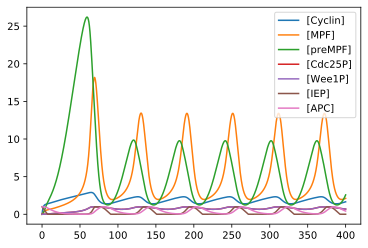

In [8]:
pyplot.plot(t,result[:,0],label='[Cyclin]')
pyplot.plot(t,result[:,1],label='[MPF]')
pyplot.plot(t,result[:,2],label='[preMPF]')
pyplot.plot(t,result[:,3],label='[Cdc25P]')
pyplot.plot(t,result[:,4],label='[Wee1P]')
pyplot.plot(t,result[:,5],label='[IEP]')
pyplot.plot(t,result[:,6],label='[APC]')
pyplot.legend()

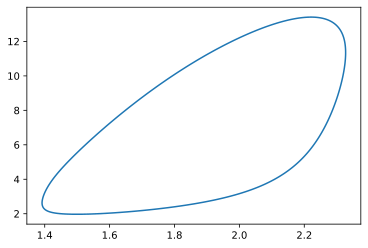

In [9]:
pyplot.plot(result[5000:,0],result[5000:,1])

## Effect of Unreplicated DNA

In [10]:

def novak_tyson_with_unreplicated_dna(variables,t):
    Cyclin, MPF, preMPF, Cdc25P, Wee1P, IEP, APC = variables
    Cdk = CDK_total - MPF - preMPF
    k25 = v25_1*(cdc25_total - Cdc25P) + v25_2*Cdc25P
    kwee =  vwee_1*Wee1P + vwee_2*(wee1_total - Wee1P)
    k2 = v2_1*(APC_total - APC) + v2_2*APC
    return [
        k1 - k2*Cyclin - k3*Cyclin*Cdk,                                               #dCyclin/dt
        k3*Cyclin*Cdk - k2*MPF - kwee*MPF + k25*preMPF,                               #dMPF/dt
        kwee*MPF - k2*preMPF - k25*preMPF,                                             #d preMPF/dt
        michaelis(ka, Ka, MPF, cdc25_total - Cdc25P) - michaelis(kb*(1 + dna*2),Kb,PPase,Cdc25P), #dCdc25P/dt
        michaelis(ke, Ke, MPF, wee1_total - Wee1P) - michaelis(kf*(1 + dna*2),Kf,PPase,Wee1P),    #dWee1P/dt
        michaelis(kg, Kg, MPF, IE_total - IEP) - michaelis(kh,Kh,PPase,IEP),          #dIEP/dt
        michaelis(kc, Kc, IEP, APC_total - APC) - michaelis(kd,Kd,PPase,APC)          #dAPC/dt
    ]

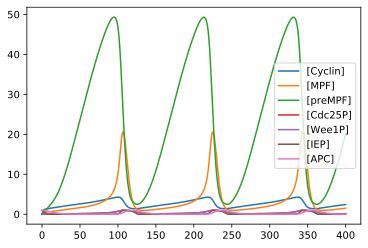

In [11]:
#Unreplicated dna:
dna = 0.5

conc0 = [0.0,0.0,0.0,0.0,0.0,1.0,1.0]
t = numpy.linspace(0,400,10000)
result = integrate.odeint(novak_tyson_with_unreplicated_dna,conc0,t)

pyplot.plot(t,result[:,0],label='[Cyclin]')
pyplot.plot(t,result[:,1],label='[MPF]')
pyplot.plot(t,result[:,2],label='[preMPF]')
pyplot.plot(t,result[:,3],label='[Cdc25P]')
pyplot.plot(t,result[:,4],label='[Wee1P]')
pyplot.plot(t,result[:,5],label='[IEP]')
pyplot.plot(t,result[:,6],label='[APC]')
pyplot.legend()

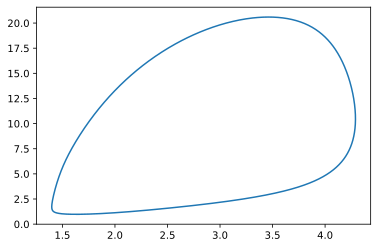

In [12]:
pyplot.plot(result[5000:,0],result[5000:,1])

## Bistability
### Novak-Tyson Model with No Cyclin Degradation

In [13]:
def novak_tyson_with_no_cyclin_degradation(variables,t):
    Cyclin, MPF, preMPF, Cdc25P, Wee1P, IEP, APC = variables
    Cdk = CDK_total - MPF - preMPF
    k25 = v25_1*(cdc25_total - Cdc25P) + v25_2*Cdc25P
    kwee =  vwee_1*Wee1P + vwee_2*(wee1_total - Wee1P)
    k2 = 0.0*(APC_total - APC) + 0.0*APC
    return [
        0.0,                                                                          #dCyclin/dt
        k3*Cyclin*Cdk - k2*MPF - kwee*MPF + k25*preMPF,                               #dMPF/dt
        kwee*MPF - k2*preMPF - k25*preMPF,                                             #d preMPF/dt
        michaelis(ka, Ka, MPF, cdc25_total - Cdc25P) - michaelis(kb,Kb,PPase,Cdc25P), #dCdc25P/dt
        michaelis(ke, Ke, MPF, wee1_total - Wee1P) - michaelis(kf,Kf,PPase,Wee1P),    #dWee1P/dt
        michaelis(kg, Kg, MPF, IE_total - IEP) - michaelis(kh,Kh,PPase,IEP),          #dIEP/dt
        michaelis(kc, Kc, IEP, APC_total - APC) - michaelis(kd,Kd,PPase,APC)          #dAPC/dt
    ]

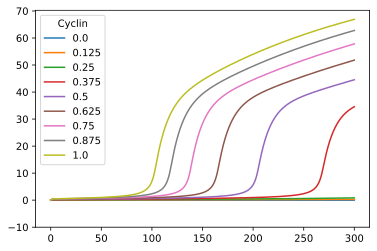

In [14]:
for i in numpy.linspace(0.0,1.0,9):
    conc0 = [i,0.0,0.0,0.0,0.0,1.0,1.0]
    t = numpy.linspace(0,300,10000)
    result = integrate.odeint(novak_tyson_with_no_cyclin_degradation,conc0,t)
    pyplot.plot(t,result[:,1], label=str(i))
    
pyplot.ylim(ymin=-10)
pyplot.legend(loc=2,title="Cyclin")